In [65]:
# Import librarys and data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

races = pd.read_csv("Data/races.csv")
runs = pd.read_csv("Data/runs.csv")

## FINDINGS:
# Should catagorize all horses with >40 runs as = 40 
# Race class does not seem to have large impact
# Horse number is indicative of performance
# Horse declared weight is indicative of performance
# Horse Actual weight is indicative of performance
# Draw should be included
# Want to think about target encoding
# Maybe exclude country - no huge findings...



In [89]:
from feature_functions import *

#runs["surface"] = [races.loc[races["race_id"]==race_id]["surface"].values[0] for race_id in runs["race_id"]]
#runs["going"] = [races.loc[races["race_id"]==race_id]["going"].values[0] for race_id in runs["race_id"]]
#runs["distance"] = [races.loc[races["race_id"]==race_id]["distance"].values[0] for race_id in runs["race_id"]]
#runs["race_class"] = [races.loc[races["race_id"]==race_id]["race_class"].values[0] for race_id in runs["race_id"]]

addHorseRaces()




Adding number of horse races ... 


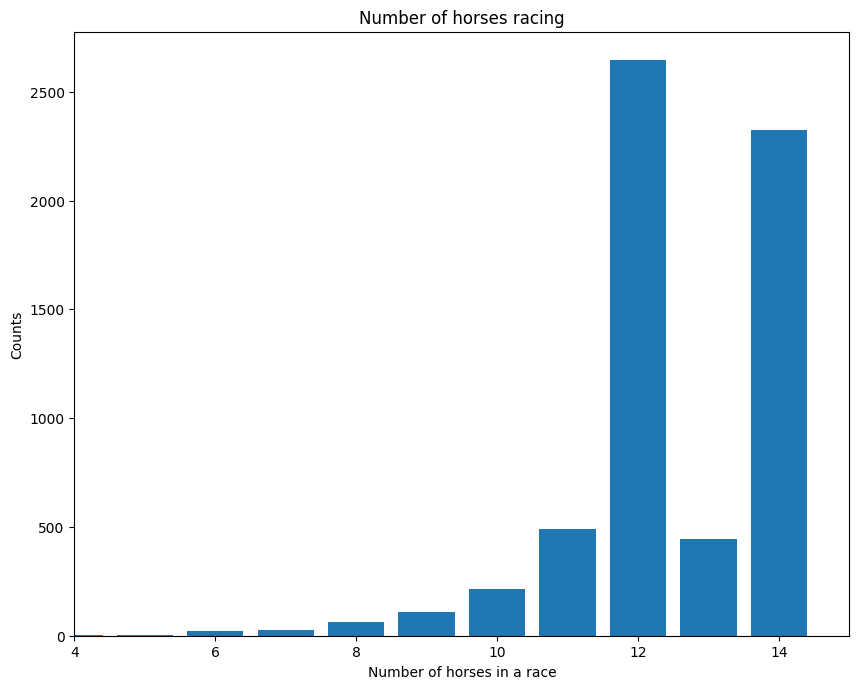

In [10]:
# Number of horses distribution
counts = np.zeros(14)
for raceID in races["race_id"]:
    numHorses = runs.loc[runs["race_id"]==raceID].shape[0]
    counts[numHorses-1] += 1
    
plt.figure(figsize=(10,8), dpi=100)
plt.bar(range(1, 15), height=counts)
plt.xlim(4, 15)
plt.xlabel("Number of horses in a race")
plt.ylabel("Counts")
plt.title("Number of horses racing")
plt.show()

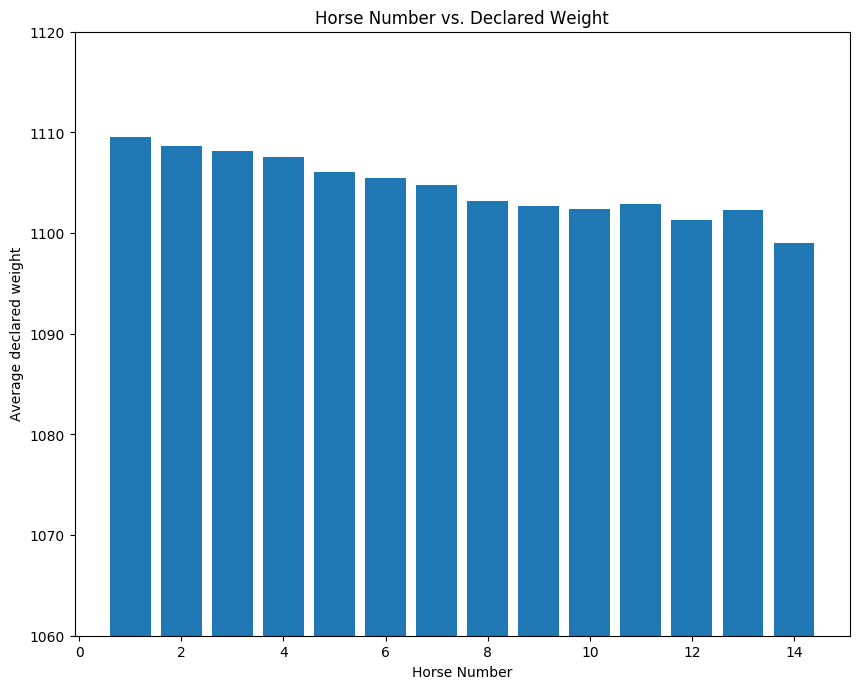

In [19]:
# Investigating horse number and weight
horseNums = range(1,15)
averages = []
for num in horseNums:
    avg = runs.loc[runs["horse_no"]==num]["declared_weight"].mean()
    averages.append(avg)
    
plt.figure(figsize=(10,8), dpi=100)
plt.bar(horseNums, averages)
plt.xlabel("Horse Number")
plt.ylabel("Average declared weight")
plt.title("Horse Number vs. Declared Weight")
plt.ylim(1060, 1120)
plt.show()

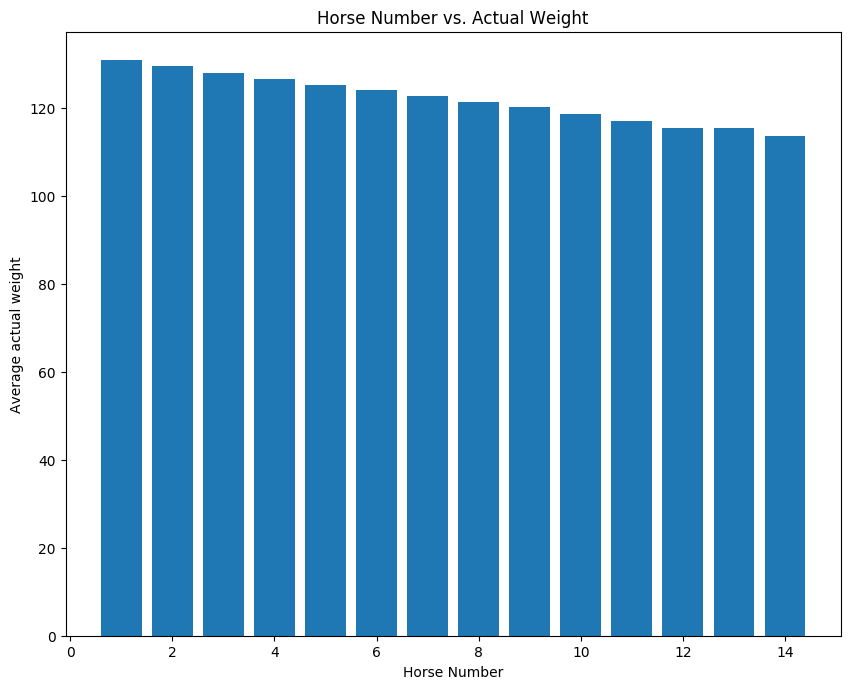

In [21]:
# Investigating horse number and weight
horseNums = range(1,15)
averages = []
for num in horseNums:
    avg = runs.loc[runs["horse_no"]==num]["actual_weight"].mean()
    averages.append(avg)
    
plt.figure(figsize=(10,8), dpi=100)
plt.bar(horseNums, averages)
plt.xlabel("Horse Number")
plt.ylabel("Average actual weight")
plt.title("Horse Number vs. Actual Weight")
plt.show()
    

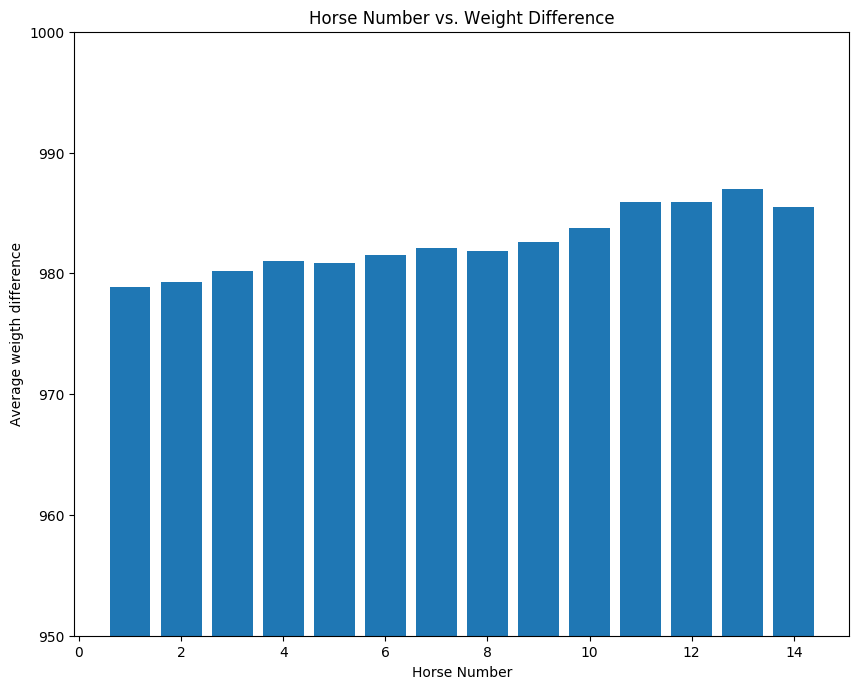

In [28]:
# Investigating horse number and weight difference
horseNums = range(1,15)
averages = []
for num in horseNums:
    avg1 = runs.loc[runs["horse_no"]==num]["declared_weight"].mean()
    avg2 = runs.loc[runs["horse_no"]==num]["actual_weight"].mean()
    averages.append(avg1-avg2)
    
plt.figure(figsize=(10,8), dpi=100)
plt.bar(horseNums, averages)
plt.xlabel("Horse Number")
plt.ylabel("Average weigth difference")
plt.title("Horse Number vs. Weight Difference")
plt.ylim(950,1000)
plt.show()   

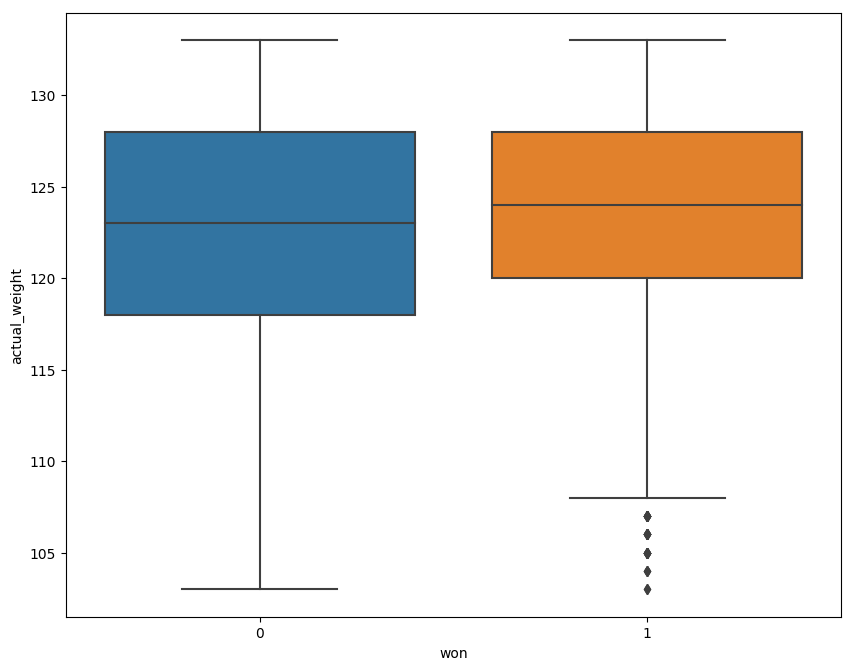

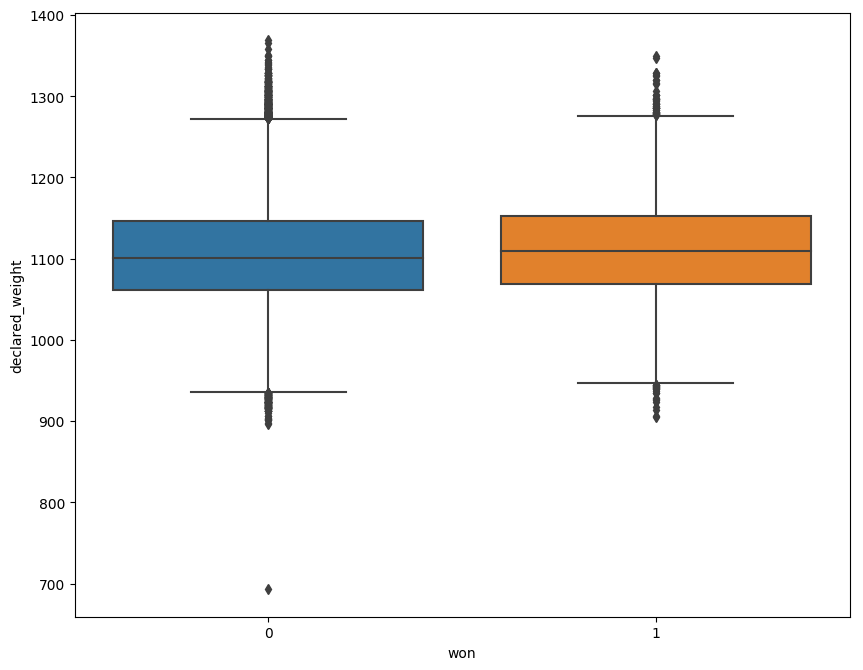

In [97]:
# Win percent and weight
plt.figure(figsize=(10,8), dpi=100)
sn.boxplot(x="won", y="actual_weight", data=runs)
plt.figure(figsize=(10,8), dpi=100)
sn.boxplot(x="won", y="declared_weight", data=runs)

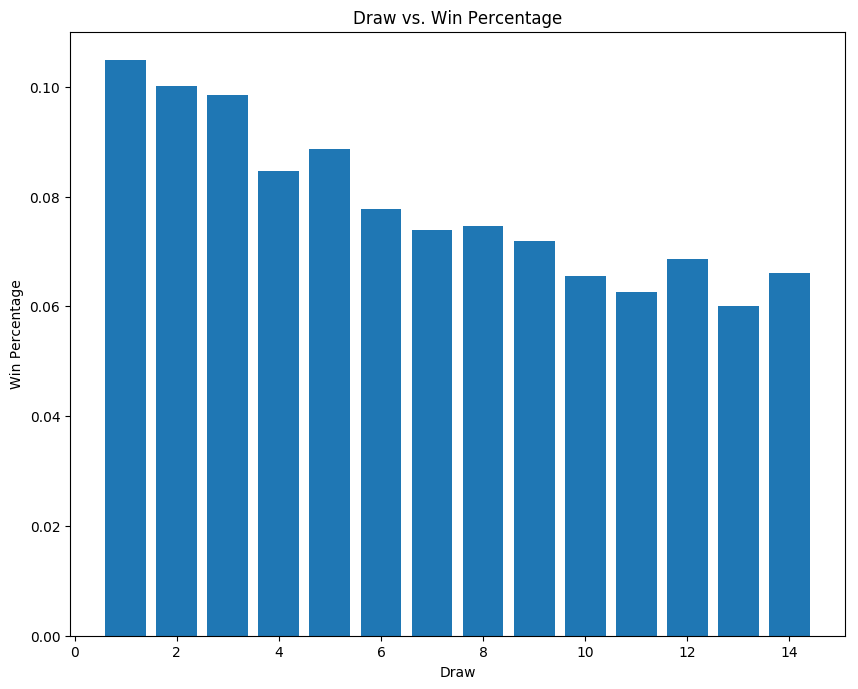

In [25]:
# Look at effect of draw and win percentage
draws = range(1, 15)
winPct = []
for draw in draws:
    avg = runs.loc[runs["draw"]==draw]["won"].mean()
    winPct.append(avg)
    
plt.figure(figsize=(10,8), dpi=100)
plt.bar(draws, winPct)
plt.xlabel("Draw")
plt.ylabel("Win Percentage")
plt.title("Draw vs. Win Percentage")
plt.show()  

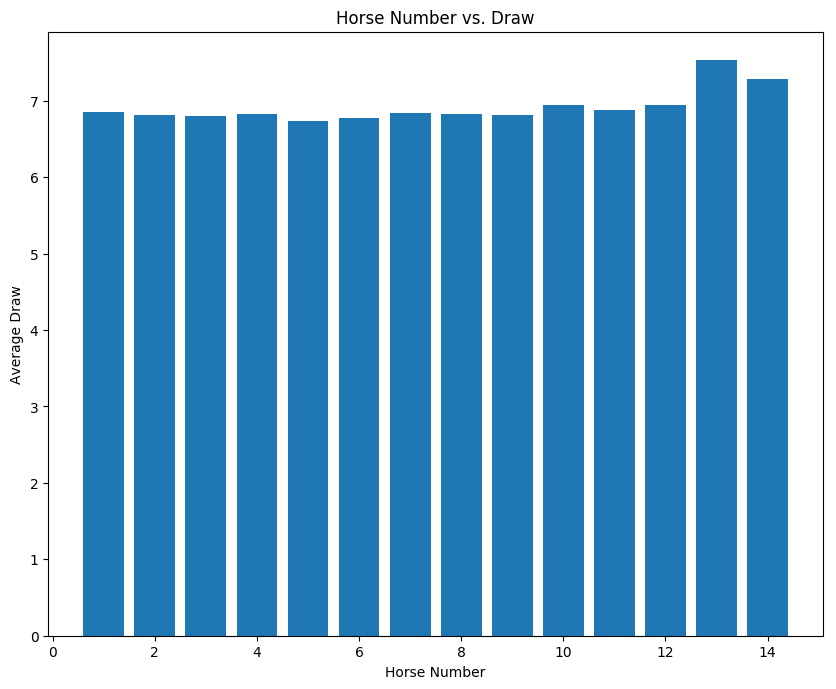

In [31]:
# Investigating horse number and draw
horseNums = range(1,15)
averages = []
for num in horseNums:
    avg = runs.loc[runs["horse_no"]==num]["draw"].mean()
    averages.append(avg)
    
plt.figure(figsize=(10,8), dpi=100)
plt.bar(horseNums, averages)
plt.xlabel("Horse Number")
plt.ylabel("Average Draw")
plt.title("Horse Number vs. Draw")
plt.show()   

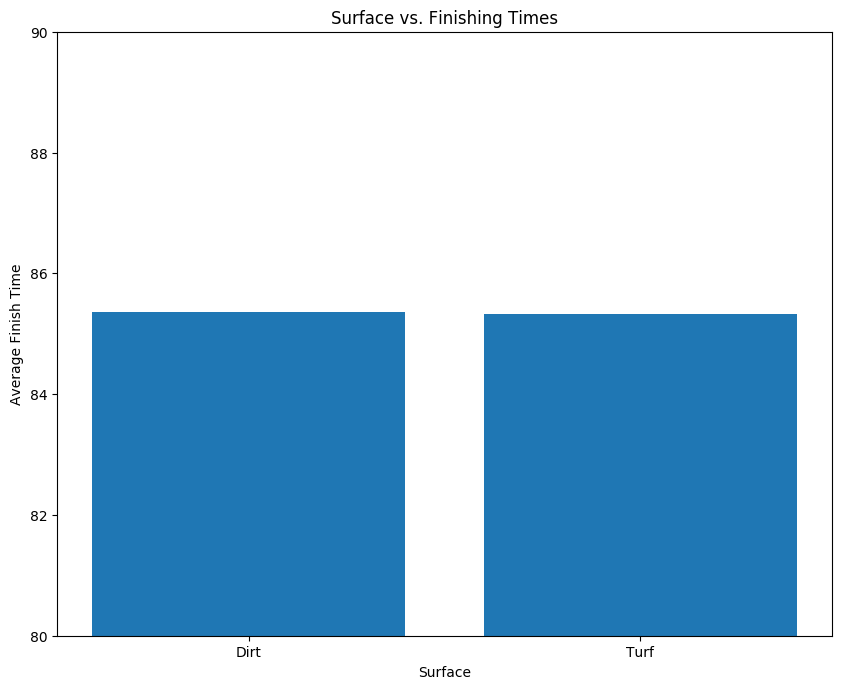

In [47]:
# Surface and finishing time
# Investigating horse number and weight difference
surfaces = np.unique(races["surface"])
averages = []
for surface in surfaces:
    surfaceRacesIDs = races.loc[races["surface"]==surface]["race_id"]
    avg = runs[runs["race_id"].isin(surfaceRacesIDs)]["finish_time"].mean()
    averages.append(avg)
    
plt.figure(figsize=(10,8), dpi=100)
plt.bar(["Turf", "Dirt"], averages)
plt.xlabel("Surface")
plt.ylabel("Average Finish Time")
plt.title("Surface vs. Finishing Times")
plt.ylim(80,90)
plt.show()   

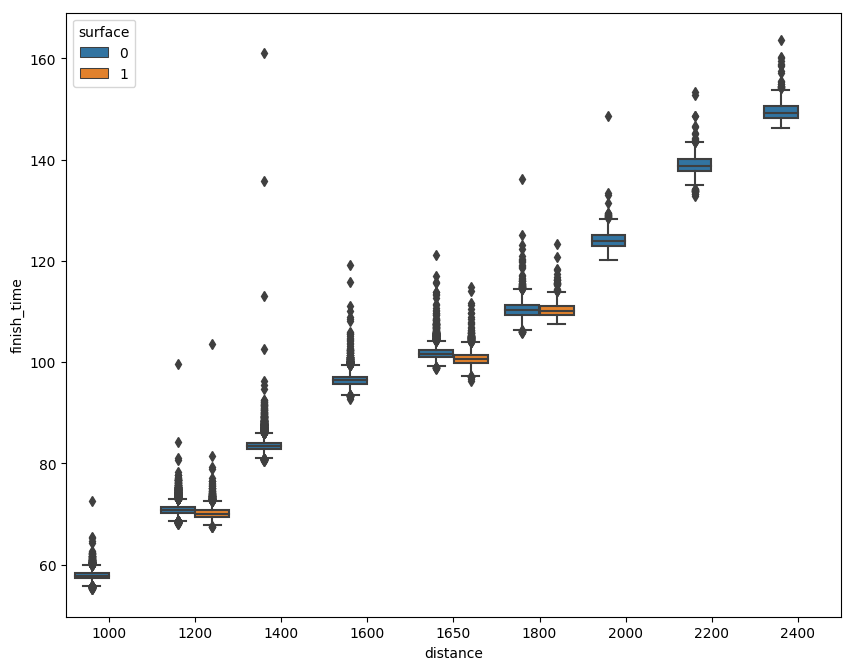

In [88]:
# Surface and finishing time and distance with seaborn

plt.figure(figsize=(10,8), dpi=100)
sn.boxplot(x="distance", y="finish_time", hue="surface", data=runs)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

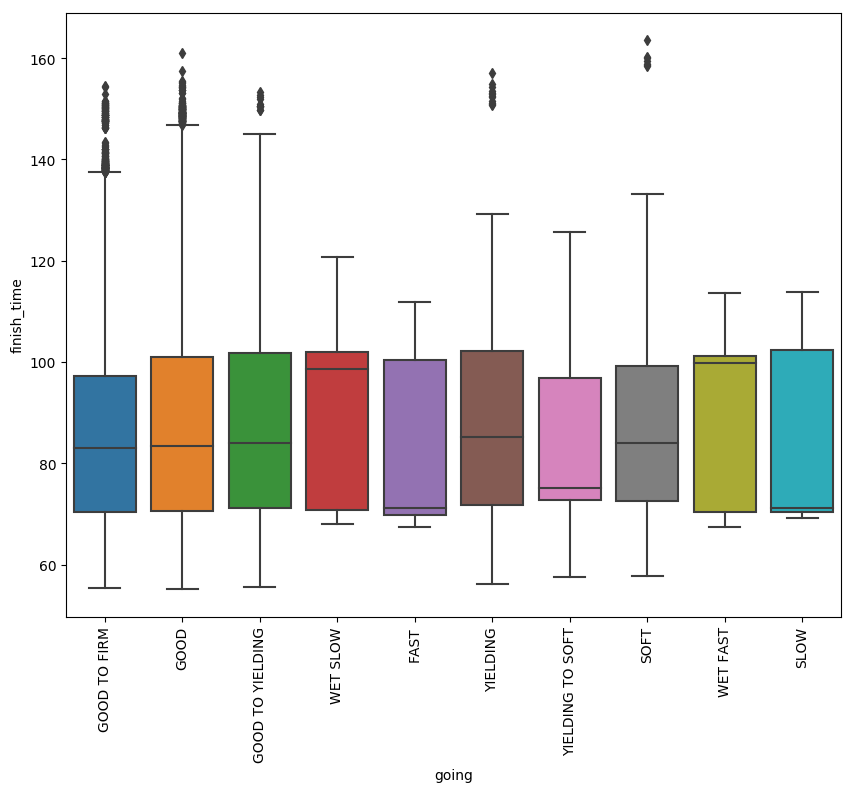

In [85]:
# Going type and finish time with seaborn
plt.figure(figsize=(10,8), dpi=100)
sn.boxplot(x="going", y="finish_time", data=runs)
plt.xticks(rotation=90)

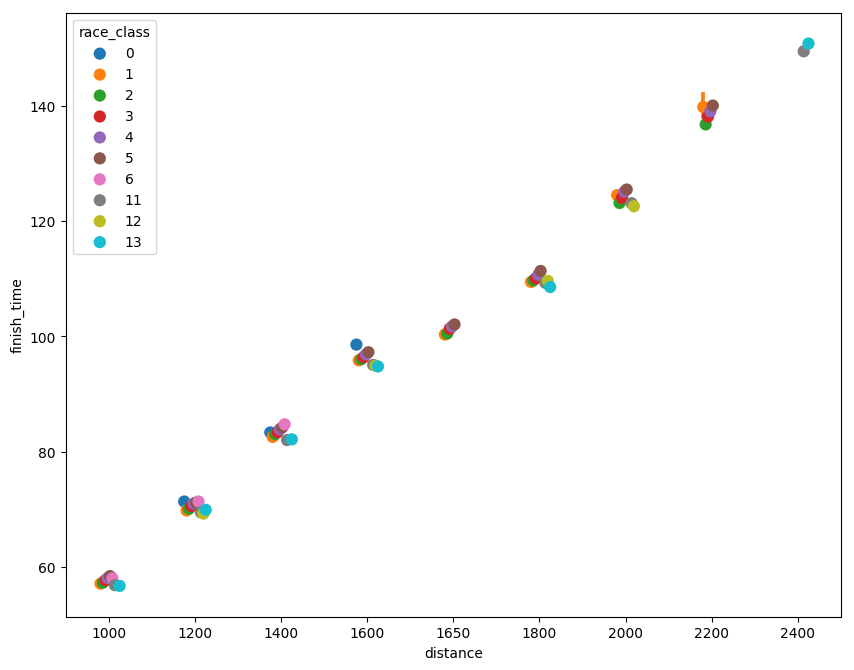

In [83]:
# Finish time and class
plt.figure(figsize=(10,8), dpi=100)
sn.pointplot(x="distance", y="finish_time", hue="race_class", data=runs, join=False, dodge=True)

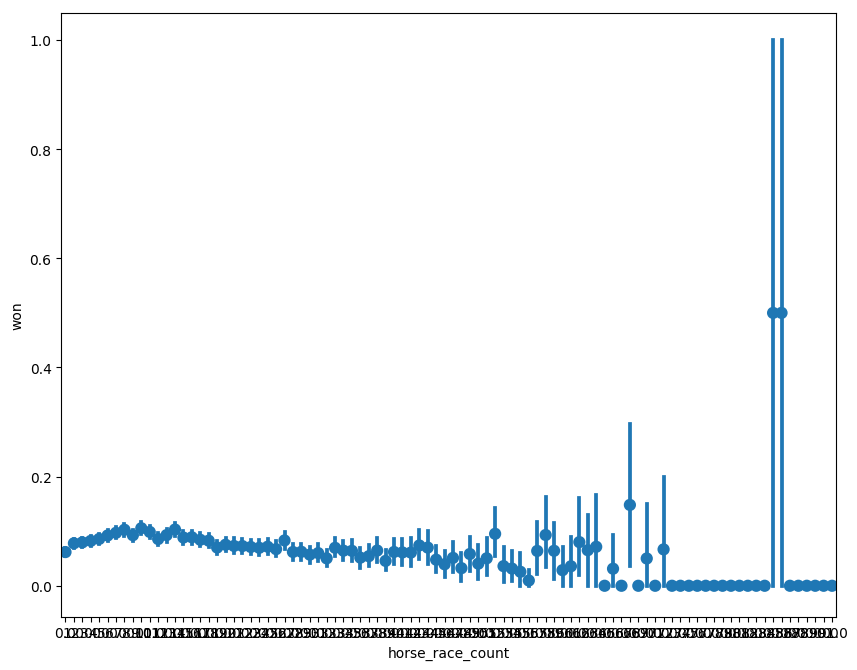

In [93]:
# Look at experiance and winniness
plt.figure(figsize=(10,8), dpi=100)
sn.pointplot(x="horse_race_count", y="won", data=runs, join=False)

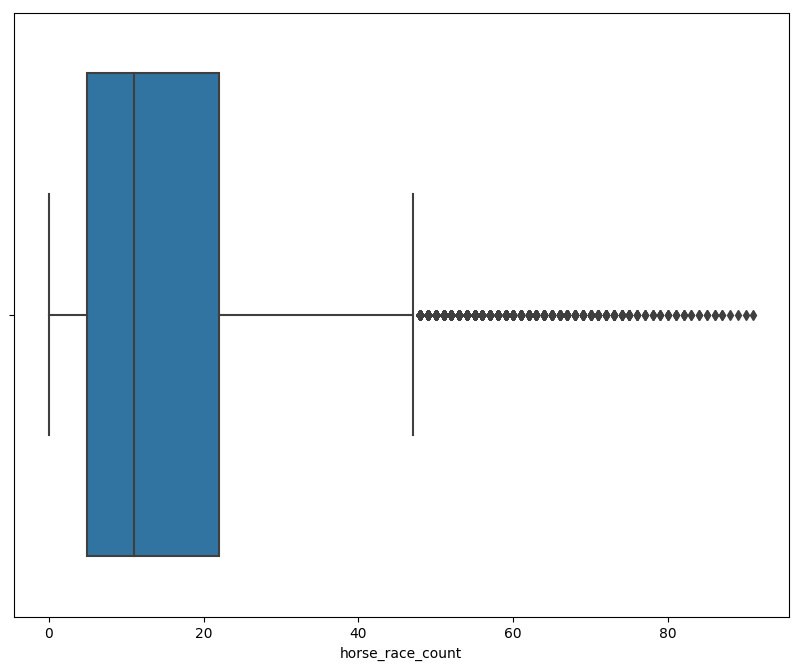

In [94]:
# Look at experiance
plt.figure(figsize=(10,8), dpi=100)
sn.boxplot("horse_race_count", data=runs)

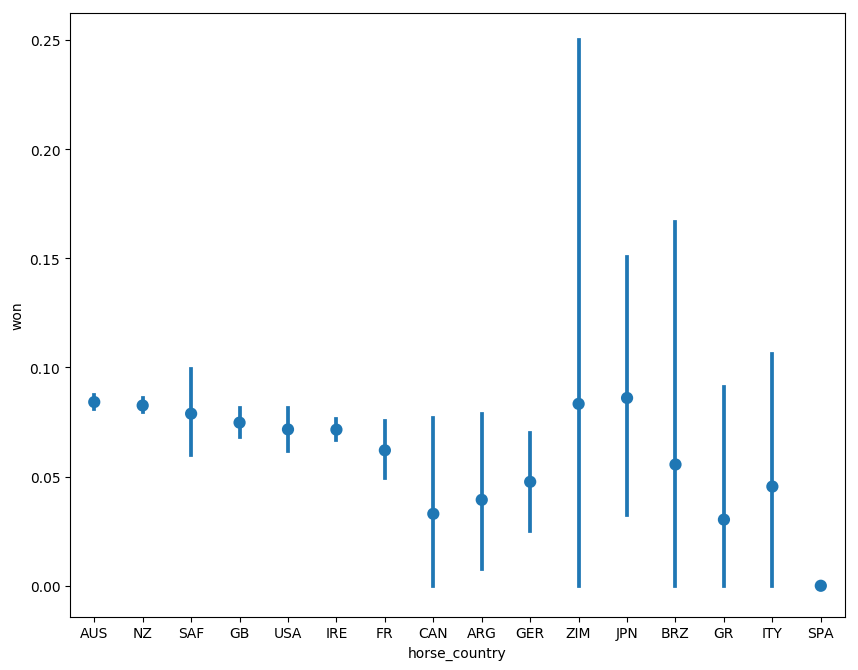

In [99]:
# Country and winningness
plt.figure(figsize=(10,8), dpi=100)
sn.pointplot(x="horse_country", y="won", data=runs, join=False)

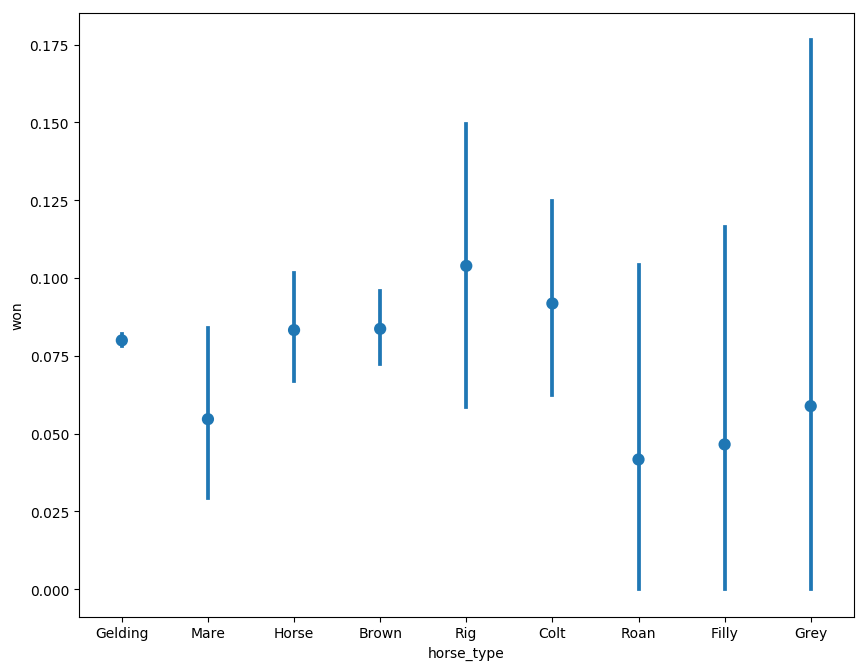

In [100]:
# Type and winningness
plt.figure(figsize=(10,8), dpi=100)
sn.pointplot(x="horse_type", y="won", data=runs, join=False)

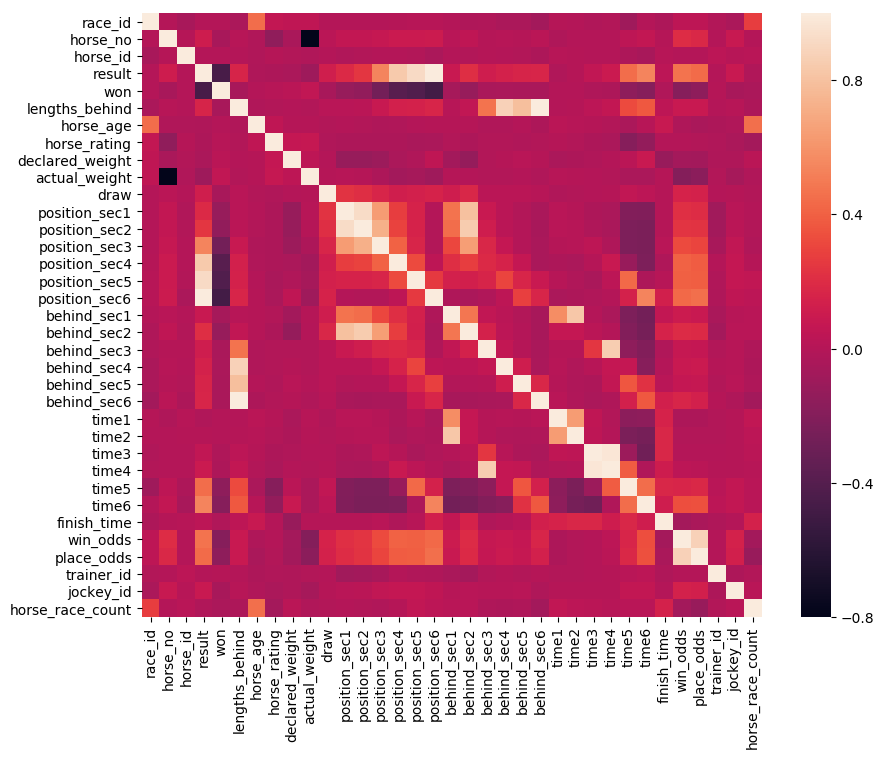

In [107]:
## GENERAL CORELATION
# Compute the correlation matrix
plt.figure(figsize=(10,8), dpi=100)
sn.heatmap(runs.corr())